# Naive Bayes

### Docente: M.Sc. Richard Fernández 

### Comprensión del negocio

Objetivo del negocio: Incrementar la tasa de conversión de clientes que compran mediante la visualización de publicidad en redes sociales.

Objetivo de ML: Predecir la probabilidad de que un cliente compre un producto mediante la visualización de la publicidad en redes sociales.

### Comprensión de los datos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as ss

from scipy.stats import chi2_contingency

from sklearn.model_selection import train_test_split

from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import roc_curve, auc, roc_auc_score

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [3]:
data = pd.read_csv('Social_Network_Ads.csv')

In [4]:
data.head(5)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [5]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

In [6]:
#data['Purchased'] = data.Purchased.astype(object)

In [7]:
data.dtypes

User ID             int64
Gender             object
Age                 int64
EstimatedSalary     int64
Purchased           int64
dtype: object

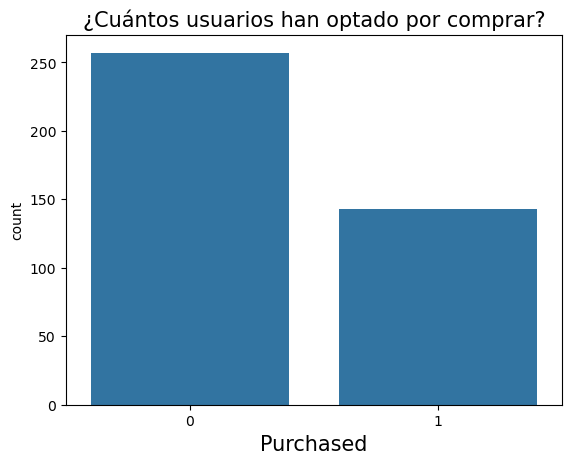

In [8]:
sns.countplot(data = data, x = 'Purchased')
plt.xlabel('Purchased', fontsize = 15)
plt.title('¿Cuántos usuarios han optado por comprar?', fontsize = 15)
plt.show()

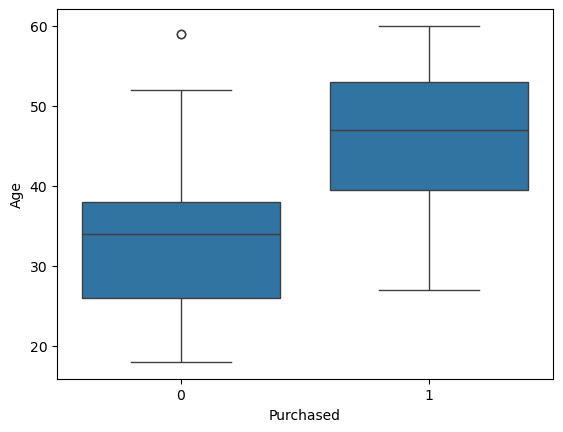

In [9]:
sns.boxplot(x='Purchased',y='Age',data=data)
plt.show()

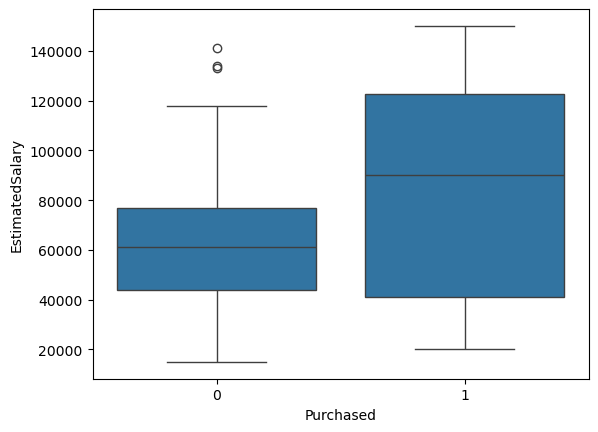

In [10]:
sns.boxplot(x='Purchased',y='EstimatedSalary',data=data)
plt.show()

In [11]:
# Test Levene

#Ho: los datos proceden de distribuciones con la misma varianza
#Ha: los datos no proceden de distribuciones con la misma varianza

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, los datos no proceden de distribuciones con la misma varianza
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, los datos proceden de distribuciones con la misma varianza

In [12]:
#Purchased vs Age

age_compra = data.loc[data.Purchased == 1, 'Age']
age_nocompra = data.loc[data.Purchased == 0, 'Age']

levene_test = ss.levene(age_compra, age_nocompra, center='median')
levene_test

LeveneResult(statistic=0.26588211332236605, pvalue=0.6063938626686647)

In [13]:
#Purchased vs EstimatedSalary

salario_compra = data.loc[data.Purchased == 1, 'EstimatedSalary']
salario_nocompra = data.loc[data.Purchased == 0, 'EstimatedSalary']

levene_test = ss.levene(salario_compra, salario_nocompra, center='median')
levene_test

LeveneResult(statistic=86.4905079209833, pvalue=9.462053663249117e-19)

In [14]:
! pip install pingouin

  Using cached patsy-0.5.6-py2.py3-none-any.whl.metadata (3.5 kB)
   ---------------------------------------- 0.0/204.4 kB ? eta -:--:--
   -- ------------------------------------- 10.2/204.4 kB ? eta -:--:--
   ----- --------------------------------- 30.7/204.4 kB 660.6 kB/s eta 0:00:01
   ----------- --------------------------- 61.4/204.4 kB 544.7 kB/s eta 0:00:01
   --------------- ----------------------- 81.9/204.4 kB 573.4 kB/s eta 0:00:01
   --------------- ----------------------- 81.9/204.4 kB 573.4 kB/s eta 0:00:01
   ----------------- --------------------- 92.2/204.4 kB 403.5 kB/s eta 0:00:01
   ----------------- --------------------- 92.2/204.4 kB 403.5 kB/s eta 0:00:01
   ----------------- --------------------- 92.2/204.4 kB 403.5 kB/s eta 0:00:01
   ----------------- --------------------- 92.2/204.4 kB 403.5 kB/s eta 0:00:01
   ----------------- --------------------- 92.2/204.4 kB 403.5 kB/s eta 0:00:01
   ----------------- --------------------- 92.2/204.4 kB 403.5 kB/s eta

ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\pip\_vendor\urllib3\response.py", line 438, in _error_catcher
    yield
  File "C:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\pip\_vendor\urllib3\response.py", line 561, in read
    data = self._fp_read(amt) if not fp_closed else b""
  File "C:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\pip\_vendor\urllib3\response.py", line 527, in _fp_read
    return self._fp.read(amt) if amt is not None else self._fp.read()
  File "C:\Users\MSI\anaconda3\envs\spacy\lib\site-packages\pip\_vendor\cachecontrol\filewrapper.py", line 98, in read
    data: bytes = self.__fp.read(amt)
  File "C:\Users\MSI\anaconda3\envs\spacy\lib\http\client.py", line 459, in read
    n = self.readinto(b)
  File "C:\Users\MSI\anaconda3\envs\spacy\lib\http\client.py", line 503, in readinto
    n = self.fp.readinto(b)
  File "C:\Users\MSI\anaconda3\envs\spacy\lib\socket.py", line 669, in readinto
    r

In [15]:
import pingouin as pg

ModuleNotFoundError: No module named 'pingouin'

In [15]:
# Test U-test o Test U de Mann-Whitney-Wilcoxon
#Ho: los datos proceden de distribuciones con la misma mediana
#Ha: los datos no proceden de distribuciones con la misma mediana

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, los datos no proceden de distribuciones con la misma mediana
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, los datos proceden de distribuciones con la misma mediana

In [16]:
#Purchased vs Age
pg.mwu(x=age_compra, y=age_nocompra, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,31921.0,two-sided,2.131027e-34,0.73715,0.868575


In [17]:
#Purchased vs EstimatedSalary
pg.mwu(x=salario_compra, y=salario_nocompra, alternative='two-sided')

,U-val,alternative,p-val,RBC,CLES
MWU,25167.5,two-sided,8.841279e-10,0.369623,0.684811


Gender     Female  Male
Purchased              
0             127   130
1              77    66


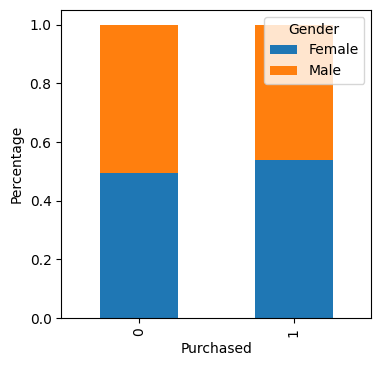

In [18]:
print(pd.crosstab(data["Purchased"],data["Gender"]))
Gender = pd.crosstab(data["Purchased"],data["Gender"])
Gender.div(Gender.sum(1).astype(float),axis=0).plot(kind="bar",stacked=True,figsize=(4,4))
plt.xlabel("Purchased")
plt.ylabel("Percentage")
plt.show()

In [19]:
#Prueba Chi-Cuadrado
#Ho: no existe dependencia entre las variables
#Ha: existe dependencia entre las variables

#Si pvalor < 5% => Se rechaza Ho, al 95% de confianza, existe dependencia entre las variables
#Si pvalor > 5% => No se rechaza Ho, al 95% de confianza, no existe dependencia entre las variables

In [20]:
#Purchased vs Gender
contigencia = pd.crosstab(data['Purchased'], data['Gender'])
contigencia

Gender,Female,Male
Purchased,,
0,127,130
1,77,66


In [23]:
contigencia = pd.crosstab(data['Purchased'], data['Gender'])
c, p, dof, expected = chi2_contingency(contigencia) 
print(p)

0.45624659183130645


### Preparación de los datos

In [24]:
X = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values

In [25]:
X[0:5]

array([[   19, 19000],
       [   35, 20000],
       [   26, 43000],
       [   27, 57000],
       [   19, 76000]], dtype=int64)

In [26]:
y[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

In [28]:
X_train[0:5]

array([[    58, 144000],
       [    59,  83000],
       [    24,  55000],
       [    26,  35000],
       [    58,  38000]], dtype=int64)

In [29]:
X_test[0:5]

array([[   30, 87000],
       [   38, 50000],
       [   35, 75000],
       [   30, 79000],
       [   35, 50000]], dtype=int64)

In [30]:
X_train_orig = X_train
X_test_orig = X_test

In [31]:
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)

In [32]:
X_train[0:5]

array([[ 1.92295008,  2.14601566],
       [ 2.02016082,  0.3787193 ],
       [-1.3822153 , -0.4324987 ],
       [-1.18779381, -1.01194013],
       [ 1.92295008, -0.92502392]])

In [33]:
X_test[0:5]

array([[-0.49618606,  0.56021375],
       [ 0.2389044 , -0.59133674],
       [-0.03675452,  0.18673792],
       [-0.49618606,  0.31122986],
       [-0.03675452, -0.59133674]])

### Modelado 

In [34]:
classifier = GaussianNB().fit(X_train, y_train)

### Evaluación 

In [35]:
y_pred = classifier.predict(X_test)

In [36]:
y_pred[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [37]:
y_test[0:5]

array([0, 0, 0, 0, 0], dtype=int64)

In [38]:
confusion_matrix(y_test, y_pred)

array([[54,  4],
       [ 1, 21]], dtype=int64)

Confusion matrix, without normalization
[[54  4]
 [ 1 21]]
Normalized confusion matrix
[[0.93103448 0.06896552]
 [0.04545455 0.95454545]]


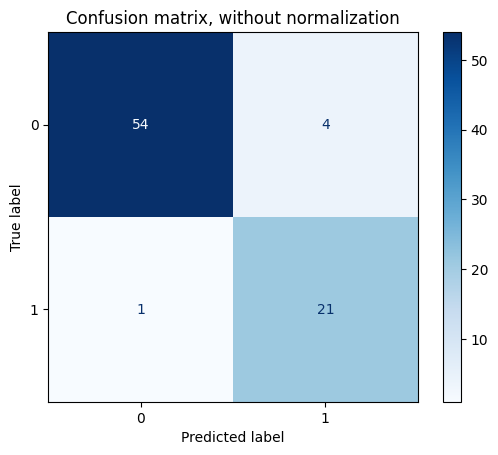

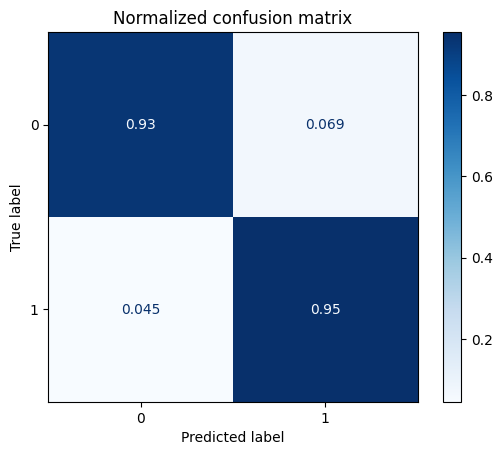

In [39]:
# Plot non-normalized confusion matrix
titles_options = [("Confusion matrix, without normalization", None),
                  ("Normalized confusion matrix", 'true')]
for title, normalize in titles_options:
    disp = ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test,
                                                 #display_labels=y_test,
                                                 cmap=plt.cm.Blues,
                                                 normalize=normalize)
    disp.ax_.set_title(title)

    print(title)
    print(disp.confusion_matrix)

plt.show()

In [40]:
y_pred_prob = classifier.predict_proba(X_test)

In [41]:
y_pred_prob[0:5]

array([[0.82002882, 0.17997118],
       [0.7668551 , 0.2331449 ],
       [0.77276139, 0.22723861],
       [0.86810583, 0.13189417],
       [0.84555185, 0.15444815]])

In [42]:
y_pred_prob[0:5,1]

array([0.17997118, 0.2331449 , 0.22723861, 0.13189417, 0.15444815])

In [43]:
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_pred_prob[:,1])

In [44]:
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9843260188087775

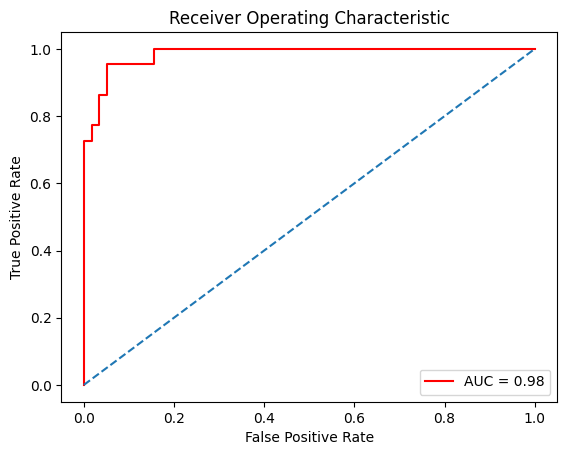

In [45]:
plt.title('Receiver Operating Characteristic')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

In [46]:
dataf = pd.concat([pd.DataFrame(X_test_orig),pd.DataFrame(y_test),pd.DataFrame(y_pred),pd.DataFrame(y_pred_prob)],axis=1)

In [47]:
dataf.head(5)

,0,1,0,0,0,1
0,30,87000,0,0,0.820029,0.179971
1,38,50000,0,0,0.766855,0.233145
2,35,75000,0,0,0.772761,0.227239
3,30,79000,0,0,0.868106,0.131894
4,35,50000,0,0,0.845552,0.154448


In [48]:
dataf.columns = ['Age', 'EstimatedSalary', 'Purchased', 'Purchased_Pred', 'Purchased_Pred_Prob_0', 'Purchased_Pred_Prob_1']

In [49]:
dataf.head(5)

,Age,EstimatedSalary,Purchased,Purchased_Pred,Purchased_Pred_Prob_0,Purchased_Pred_Prob_1
0,30,87000,0,0,0.820029,0.179971
1,38,50000,0,0,0.766855,0.233145
2,35,75000,0,0,0.772761,0.227239
3,30,79000,0,0,0.868106,0.131894
4,35,50000,0,0,0.845552,0.154448


In [50]:
quantiles = dataf['Purchased_Pred_Prob_1'].quantile(q=[0.20,0.40,0.60,0.80])
quantiles

0.2    0.057378
0.4    0.158481
0.6    0.312742
0.8    0.766919
Name: Purchased_Pred_Prob_1, dtype: float64

In [51]:
dataf.to_csv('D:/Bases/Kaggle/Social Network Ads/dataf.csv', index = False)

### Implementación

Se puede exportar el modelo más adecuado para ponerlo en un ambiente de producción. A partir de ello se puede generar un API para alimentar una aplicación web o móvil.

A continuación se exportará el modelo más adecuado.

In [52]:
import pickle

In [53]:
Pkl_Filename = "D:/classifier.pkl"

with open (Pkl_Filename, 'wb') as file:
    pickle.dump(classifier, file)

### Tarea

1.Para la base de datos dataf, colocar los valores originales de las primeras 3 variables.

2.Para la base de datos dataf, crear una variable "score", con las categorías: Muy alto, alto, medio, bajo y muy bajo.
(Usar: Target_Pred_Prob_1)

3.Comparar los modelos y presentar un cuadro resumen de la sensibilidad, ROC y GINI:
a. NB
b. NB con smote
c. NB con over
d. NB con under